In [1]:
from keras.datasets import mnist
data = mnist.load_data()

In [5]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train_np = X_train.reshape(X_train.shape[0], -1)/255
X_test_np = X_test.reshape(X_test.shape[0], -1)/255
X_train_np[0:1].shape
max(list(X_train_np[0]))

1.0

In [304]:
import numpy as np
hidden_layer = 100
outputs = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(10, 1)
i_wt_0_1 = np.random.random((28*28, hidden_layer))
i_wt_1_2 = np.array([np.random.random((hidden_layer, 1)) for i in range(len(outputs))])
X_train_np[0:1].shape, i_wt_0_1.shape, i_wt_1_2.shape, outputs.shape

((1, 784), (784, 100), (10, 100, 1), (10, 1))

In [305]:
def relu(x):
    return (x > 0) * x

max_pred = 28*28
def predict_one(input, number, wt_0_1, wt_1_2):
    layer_1 = relu(input.dot(wt_0_1))
    #print(layer_1.shape, wt_1_2[number].shape)
    output =  layer_1.dot(wt_1_2[number])
    return np.sum(output)/(max_pred*(hidden_layer/len(outputs)))
predict_one(X_train_np[0:1], 5, i_wt_0_1, i_wt_1_2)

0.3626671744440025

In [306]:
input = X_train_np[0]

In [307]:
from copy import copy, deepcopy
from tqdm import tqdm
wt_0_1 = deepcopy(i_wt_0_1)
wt_1_2 = deepcopy(i_wt_1_2)
alpha = 0.01
for times in tqdm(range(50)):
    full_error = 0
    for i in range(len(y_train)):
        input = X_train_np[i:i+1]
        label = y_train[i:i+1]
        for nu in range(10):
            #print(input.shape, wt_0_1.shape)
            layer_1 = relu(input.dot(wt_0_1))
            #print(layer_1.shape, wt_1_2.shape)
            prediction = layer_1.dot(wt_1_2[nu])/(max_pred*(hidden_layer))
            expected = label.reshape(1,1) == nu
            #print('prediction', prediction)
            #print('expected', expected)
            error = np.sum(expected - prediction)**2
            #print(error)
            full_error += error
            d_2_1 = expected - prediction
            #print(d_2_1.shape, wt_1_2[nu].shape)
            d_1_0 = d_2_1.dot(wt_1_2[nu].T) * (layer_1 > 0)
            #print(layer_1.T.shape, d_2_1.shape, wt_1_2[nu].shape)
            w_2_1_delta = layer_1.T.dot(d_2_1)
            #print(w_2_1_delta.shape)
            #print(input.T.shape, d_1_0.shape, wt_0_1.shape)
            w_1_0_delta = input.T.dot(d_1_0)
            #print(w_1_0_delta.shape)
            wt_1_2[nu] += w_2_1_delta * alpha
            wt_0_1 += w_1_0_delta * alpha
    # print(full_error)

100%|███████████████████████████████████████████████████████████████████████| 50/50 [1:48:12<00:00, 129.86s/it]


In [308]:
print(y_train[0:1])
predict_one(X_train_np[0:1], 5, wt_0_1, wt_1_2)

[5]


8.751881001882786

In [310]:
def predict_digit(image, wt_0_1, wt_1_2):
    probabilities = []
    for i in range(10): 
        probabilities.append(predict_one(image, i, wt_0_1, wt_1_2))
    return np.array(probabilities).argmax()

In [311]:
predict_digit(X_train_np[0:1], wt_0_1, wt_1_2)

5

In [312]:
import matplotlib.pyplot as plt
correct = 0
incorrect = 0
wrongs = np.array(9)
exp_pre = []
wrongs = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
limit = 5
for i in tqdm(range(len(y_train))):
    prediction = predict_digit(X_train_np[i:i+1], wt_0_1, wt_1_2)
    if prediction == y_train[i]:
        correct += 1
    else:
        incorrect += 1
        exp_pre.append([y_train[i], prediction])
        wrongs[y_train[i]] += 1
        if y_train[i] == 5 and limit > 0:
            limit -= 1
            #plt.imshow(X_train[i])
            #print(prediction)
            #plt.show()
            
print(correct, incorrect)
print('accuracy', 100 * correct/ (correct + incorrect))
#50 time for(40 hidden) 1000# all data accuracy - 86.015, time - 03:49
#50 time for(40 hidden) 10000# all data accuracy - 94.10, time - 08:36
#50 time for(40 hidden) all# data accuracy - 97.13, time - 01:03:36
#50 time for(100 hidden) all# data accuracy - 98.83, time - 01:48:12

100%|██████████████████████████████████████████████████████████████████| 60000/60000 [00:15<00:00, 3773.57it/s]

59298 702
accuracy 98.83


In [296]:
print(wrongs)

[101, 84, 175, 290, 256, 213, 93, 244, 120, 141, 0]


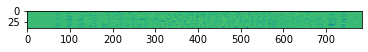

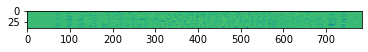

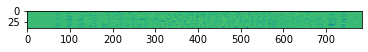

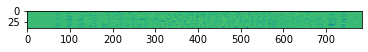

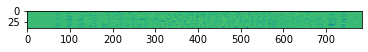

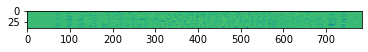

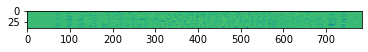

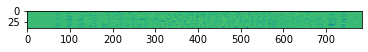

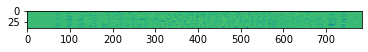

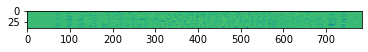

In [301]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(wt_0_1.T)
    plt.show()

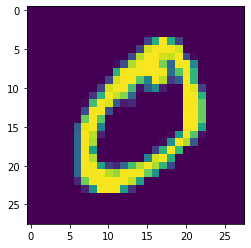

In [293]:
plt.imshow(X_train[1])

In [294]:
!pwd

/Users/tnluser/BYJUS/temp/experiments
